In [ ]:
#Before execution, Try the below command and compile in command prompt.
#GCC compiler is required for preparAtion.

#cd ../../utils
#gcc -cpp -fPIC -shared lib_cvtIntegralImage45.c -lm -o lib_cvtIntegralImage45.so -O3 std=c99

In [ ]:
import os
os.chdir('../')
os.getcwd()

'/home/me/github/RSF'

In [ ]:
!which python

/home/me/miniconda3/bin/python


In [ ]:
!gcc -cpp -fPIC -shared ./utils/lib_cvtIntegralImage45.c -lm -o ./utils/lib_cvtIntegralImage45.so -O3 -std=c99

In [ ]:
from utils.SeparabilityFilter import *

In [ ]:
import cv2
from PIL import Image
import PIL.ImageOps
from scipy import stats
import h5py

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time


import glob
import os.path as osp
from PIL import Image

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result
def add_margin(cv_gray_img, top, right, bottom, left):
    height, width = cv_gray_img.shape
    new_width = width + right + left
    new_height = height + top + bottom
    result = np.zeros((new_height, new_width), dtype=np.uint8)
    result[top:-bottom, left:-right] = cv_gray_img
    return result

def pil2cv(image):
    ''' PIL型 -> OpenCV型 '''
    new_image = np.array(image)
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(image, cv2.COLOR_RGBA2BGRA)
    return new_image

def cv2pil(image):
    ''' OpenCV型 -> PIL型 '''
    new_image = image.copy()
    if new_image.ndim == 2:  # モノクロ
        pass
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)
    new_image = Image.fromarray(new_image)
    return new_image

def make_datapath_list(rootpath = "./data/hymenoptera_data/"):
    """
    Returns
    -------
    path_list : list
        データへのパスを格納したリスト
    """
    target_path = osp.join(rootpath+'\\*.avi')
    print(target_path)

    path_list = []  # ここに格納する

    # globを利用してサブディレクトリまでファイルパスを取得する
    for path in glob.glob(target_path):
        path_list.append(path)

    return path_list



In [ ]:
X = cv2.imread('./data/videoframes/000001.jpg') # sample1.png is a gray-scale CG generated face image
X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
print(X.shape)
orgHeight, orgWidth = X.shape[:2]
#size = (orgHeight//2, orgWidth//2)
# size = (orgWidth//10, orgHeight//10)

# X = cv2.resize(X, size)
print(X.shape)

(720, 1280)
(720, 1280)


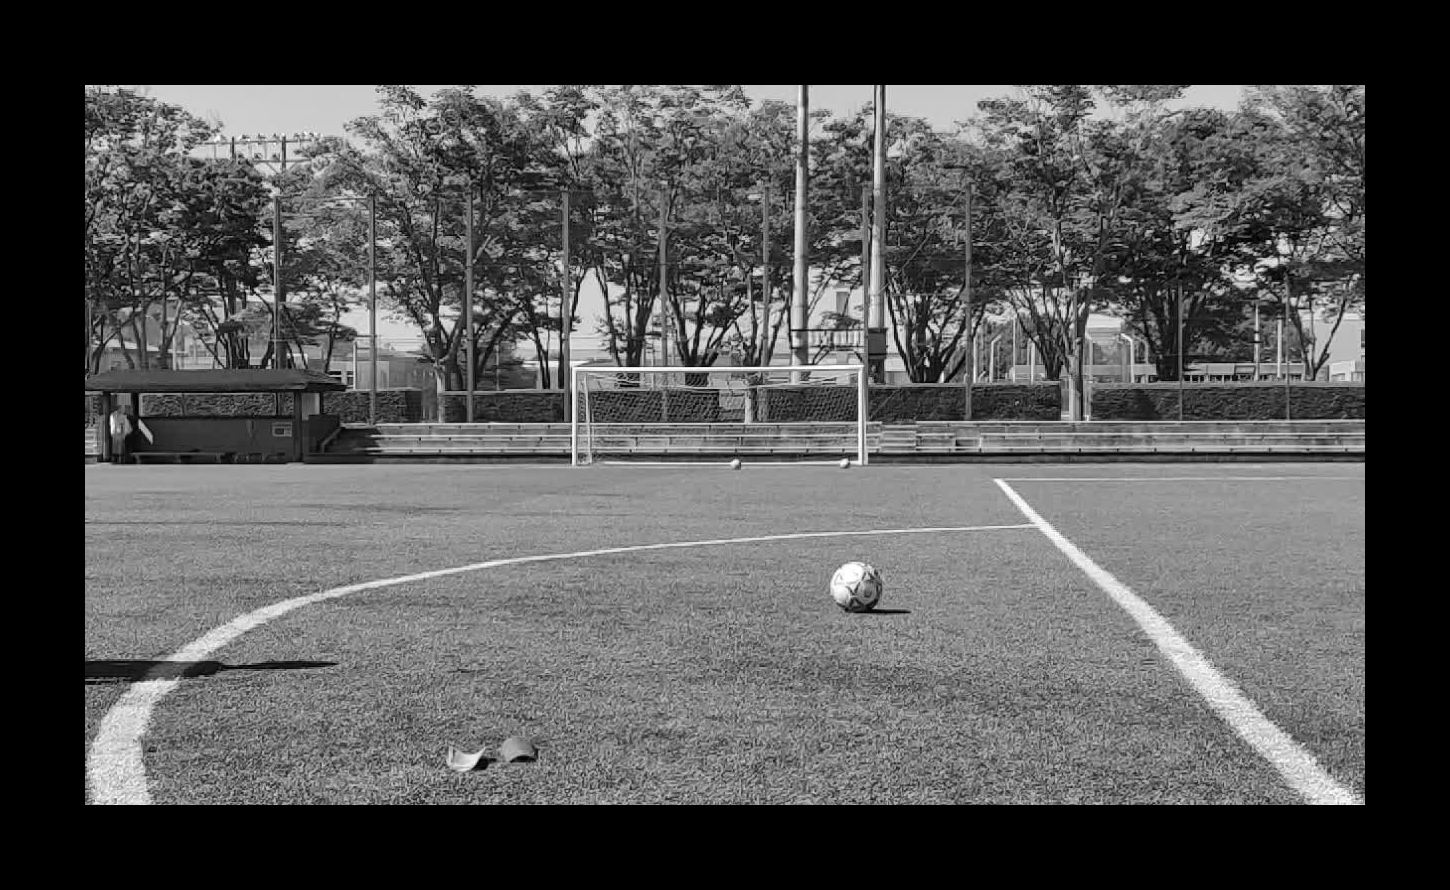

In [ ]:
# x = add_margin(X, height//2, width//2, height//2, width//2)
nR = 85
x = add_margin(X, nR, nR, nR, nR)
X = x
cv2pil(x)

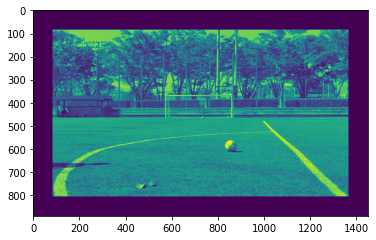

In [ ]:
plt.imshow(X)

In [ ]:
%%time
X = X.astype(np.float64)
H, W = X.shape
%time I1 = cvtIntegralImage(X)                 # calculate integral image
%time P1 = cvtIntegralImage(X**2)    # calculate integral image of squared pixel value
%time I2 = cvtIntegralImage45(X)               # calculate 45 degrees integral image
%time P2 = cvtIntegralImage45(X**2)  # calculate 45 degrees integral image of squared pixel value
#nR = 30      # filter size parameter
#nTH = 0.10 # threshold for finding local peaks
#nR = 30      # filter size parameter
nTH = 0.145 # threshold for finding local peaks

P = np.zeros((H,W,4), np.float64)
%time P[:,:,0:2] =  cvtCombSimpRectFilter(I1,P1,nR)   # apply vertical and horizontal rectangular filters
%time P[:,:,2:4] = cvtCombSimpRectFilter45(I2,P2,nR)   # apply vertical and horizontal rectangular filters
P[P<=0] = 0#0+1e-7
finalMap1 = stats.gmean(P[:,:,0:4]+1e-8, 2)
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 12.3 ms, sys: 3.99 ms, total: 16.2 ms
Wall time: 15.8 ms
CPU times: user 19.2 ms, sys: 0 ns, total: 19.2 ms
Wall time: 18.3 ms
CPU times: user 13.3 ms, sys: 4.05 ms, total: 17.4 ms
Wall time: 17.2 ms
CPU times: user 14.4 ms, sys: 3.92 ms, total: 18.3 ms
Wall time: 17.9 ms
CPU times: user 135 ms, sys: 36.1 ms, total: 171 ms
Wall time: 170 ms
CPU times: user 148 ms, sys: 28 ms, total: 176 ms
Wall time: 176 ms
CPU times: user 13.9 ms, sys: 85 µs, total: 14 ms
Wall time: 14 ms
CPU times: user 449 ms, sys: 80.1 ms, total: 529 ms
Wall time: 524 ms


In [ ]:
np.max(finalMap1)

0.18596199549917608

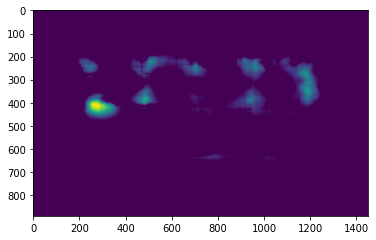

In [ ]:
plt.imshow(finalMap1)

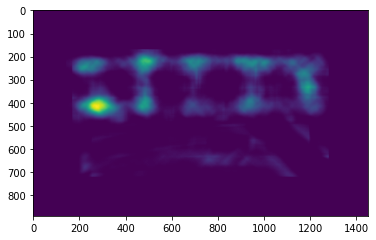

In [ ]:
finalMap2 = np.mean(P[:,:,0:4], 2)
plt.imshow(finalMap2)

In [ ]:
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 21.2 ms, sys: 56 µs, total: 21.3 ms
Wall time: 19.8 ms


In [ ]:
PL1

array([[4.11000000e+02, 4.11000000e+02, 4.11000000e+02, 4.10000000e+02,
        4.23000000e+02, 4.23000000e+02],
       [2.74000000e+02, 2.81000000e+02, 2.65000000e+02, 2.67000000e+02,
        2.75000000e+02, 2.67000000e+02],
       [1.85961995e-01, 1.85585114e-01, 1.84650429e-01, 1.84344589e-01,
        1.73901465e-01, 1.70359454e-01]])

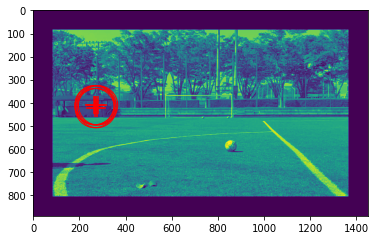

In [ ]:
currentAxis = plt.gca()
for i in range(0, PL1.shape[1]):
    currentAxis.add_patch(plt.Circle(xy=(PL1[1,i], PL1[0,i]), radius=nR, fill=False, edgecolor='r', linewidth=1))
    plt.scatter(PL1[1,i], PL1[0,i], s=300, marker="+", c="r")
plt.imshow(X)

In [ ]:
X = cv2.imread('./data/videoframes/000001.jpg') # sample1.png is a gray-scale CG generated face image
X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
print(X.shape)
orgHeight, orgWidth = X.shape[:2]
size = (orgHeight//2, orgWidth//2)
size = (orgWidth//10, orgHeight//10)

X = cv2.resize(X, size)
print(X.shape)

(720, 1280)
(72, 128)


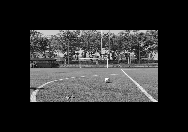

In [ ]:
#x = add_margin(X, height//2, width//2, height//2, width//2)
nR = 10
x = add_margin(X, nR, nR, nR, nR)
X = x
cv2pil(x)

In [ ]:
%%time
X = X.astype(np.float64)
H, W = X.shape
%time I1 = cvtIntegralImage(X)                 # calculate integral image
%time P1 = cvtIntegralImage(np.power(X, 2))    # calculate integral image of squared pixel value
%time I2 = cvtIntegralImage45(X)               # calculate 45 degrees integral image
%time P2 = cvtIntegralImage45(np.power(X, 2))  # calculate 45 degrees integral image of squared pixel value
#nR = 30      # filter size parameter
#nTH = 0.10 # threshold for finding local peaks
# nR = 400      # filter size parameter
nTH = 0.40 # threshold for finding local peaks

P = np.zeros((H,W,4), np.float64)
%time P[:,:,0:2] =  cvtCombSimpRectFilter(I1,P1,nR)   # apply vertical and horizontal rectangular filters
%time P[:,:,2:4] = cvtCombSimpRectFilter45(I2,P2,nR)   # apply vertical and horizontal rectangular filters
P[P<=0] = 0#0+1e-7
finalMap1 = stats.gmean(P[:,:,0:4]+1e-8, 2)
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 432 µs, sys: 0 ns, total: 432 µs
Wall time: 346 µs
CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms
Wall time: 1.06 ms
CPU times: user 668 µs, sys: 26 µs, total: 694 µs
Wall time: 608 µs
CPU times: user 1 ms, sys: 0 ns, total: 1 ms
Wall time: 681 µs
CPU times: user 4.06 ms, sys: 0 ns, total: 4.06 ms
Wall time: 3.76 ms
CPU times: user 4.77 ms, sys: 0 ns, total: 4.77 ms
Wall time: 4.56 ms
CPU times: user 206 µs, sys: 0 ns, total: 206 µs
Wall time: 211 µs
CPU times: user 19 ms, sys: 132 µs, total: 19.1 ms
Wall time: 16.3 ms


In [ ]:
np.max(finalMap1)

0.13194677230408766

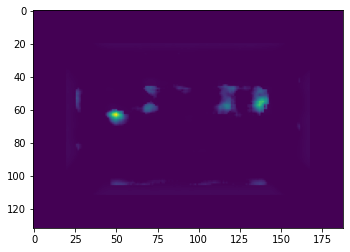

In [ ]:
plt.imshow(finalMap1)

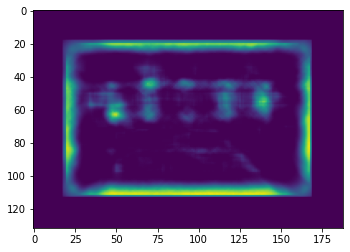

In [ ]:
finalMap2 = np.mean(P[:,:,0:4], 2)
plt.imshow(finalMap2)

In [ ]:
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

CPU times: user 969 µs, sys: 0 ns, total: 969 µs
Wall time: 561 µs


In [ ]:
PL1

array([], shape=(3, 0), dtype=float64)

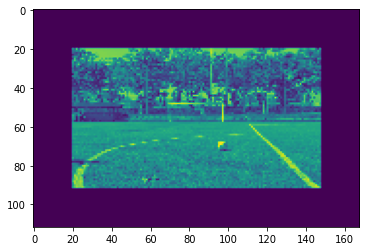

In [ ]:
currentAxis = plt.gca()
for i in range(0, PL1.shape[1]):
    currentAxis.add_patch(plt.Circle(xy=(PL1[1,i], PL1[0,i]), radius=nR, fill=False, edgecolor='r', linewidth=1))
    plt.scatter(PL1[1,i], PL1[0,i], s=300, marker="+", c="r")
plt.imshow(X)

In [ ]:
X = cv2.imread('testimages/DSC_3137.JPG') # sample1.png is a gray-scale CG generated face image
X = cv2.cvtColor(X, cv2.COLOR_RGB2GRAY)
print(X.shape)
orgHeight, orgWidth = X.shape[:2]
#size = (orgHeight//2, orgWidth//2)
size = (orgWidth//10, orgHeight//10)

X = cv2.resize(X, size)
print(X.shape)

In [ ]:
#x = add_margin(X, height//2, width//2, height//2, width//2)
nR = 27
x = add_margin(X, nR, nR, nR, nR)
X = x
cv2pil(x)

In [ ]:
%%time
X = X.astype(np.float64)
H, W = X.shape
%time I1 = cvtIntegralImage(X)                 # calculate integral image
%time P1 = cvtIntegralImage(np.power(X, 2))    # calculate integral image of squared pixel value
%time I2 = cvtIntegralImage45(X)               # calculate 45 degrees integral image
%time P2 = cvtIntegralImage45(np.power(X, 2))  # calculate 45 degrees integral image of squared pixel value
#nR = 30      # filter size parameter
#nTH = 0.10 # threshold for finding local peaks
#nR = 50      # filter size parameter
nTH = 0.50 # threshold for finding local peaks

P = np.zeros((H,W,4), np.float64)
%time P[:,:,0:2] =  cvtCombSimpRectFilter(I1,P1,nR)   # apply vertical and horizontal rectangular filters
%time P[:,:,2:4] = cvtCombSimpRectFilter45(I2,P2,nR)   # apply vertical and horizontal rectangular filters
P[P<=0] = 0#0+1e-7
finalMap1 = stats.gmean(P[:,:,0:4]+1e-8, 2)
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

In [ ]:
np.max(finalMap1)

In [ ]:
plt.imshow(finalMap1)

In [ ]:
finalMap2 = np.mean(P[:,:,0:4], 2)
plt.imshow(finalMap2)

In [ ]:
%time PL1 = cvtFindLocalPeakX(finalMap1,1,nTH)

In [ ]:
PL1

In [ ]:
currentAxis = plt.gca()
for i in range(0, PL1.shape[1]):
    currentAxis.add_patch(plt.Circle(xy=(PL1[1,i], PL1[0,i]), radius=nR, fill=False, edgecolor='r', linewidth=1))
    plt.scatter(PL1[1,i], PL1[0,i], s=300, marker="+", c="r")
plt.imshow(X)